In [1]:
import numpy as np
from scipy.spatial import distance
import pandas as pd
import math
import os
import numpy as np
import nibabel as nib
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
from nilearn import image, datasets, plotting, masking
import pandas as pd
from scipy.spatial import distance

import torchvision.models as Alexnet
from torchvision import transforms

import torch
import torchvision.models as models


import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

import random

import csv

def upper(df):
    try:
        assert(type(df)==np.ndarray)
    except:
        if type(df)==pd.DataFrame:
            df = df.values
        else:
            raise TypeError('Must be np.ndarray or pd.DataFrame')
    mask = np.triu_indices(df.shape[0], k=1)
    return df[mask]

In [2]:
def plot_rdm(rdm_data, image_labels=None, title="RDM", cmap="viridis", xlabel="Image", ylabel="Image", cbar_label="Dissimilarity"):    
        
    # Create the plot
    plt.imshow(rdm_data)
    plt.xlabel("Image", fontsize=15)
    plt.ylabel("Image", fontsize=15)
    
    plt.title("RDM", fontsize=20)
    cbar = plt.colorbar()
    cbar.ax.set_ylabel('Dissimilarity', fontsize=15)
    plt.show()


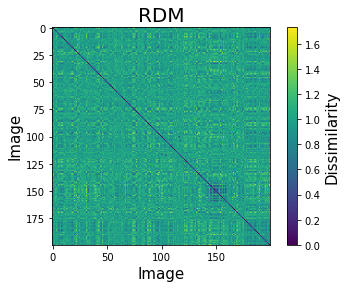

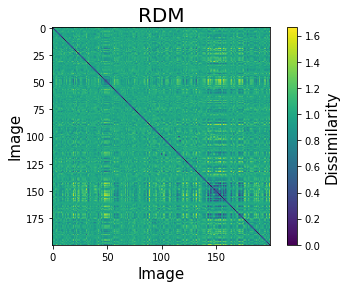

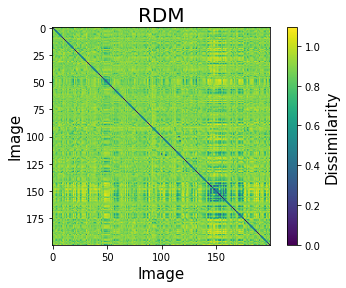

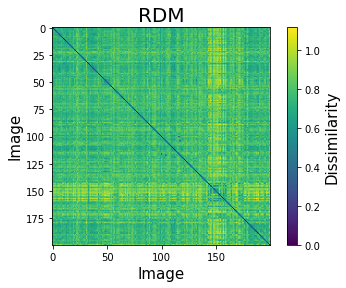

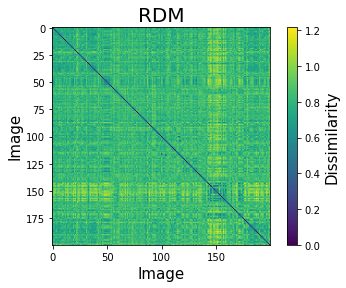

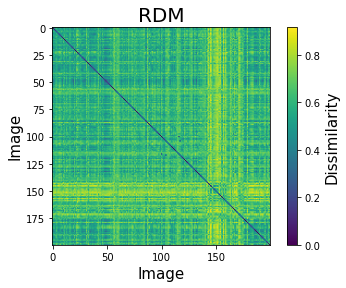

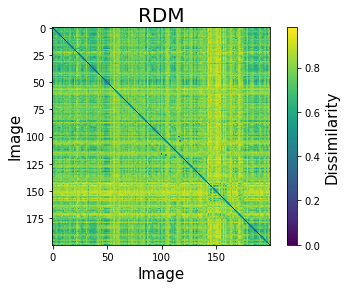

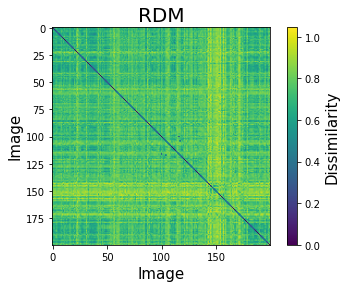

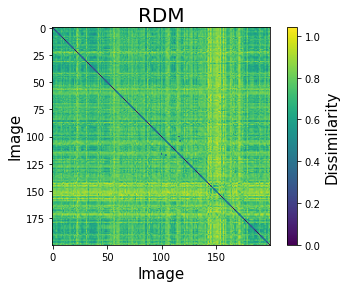

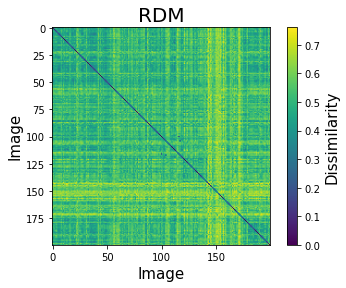

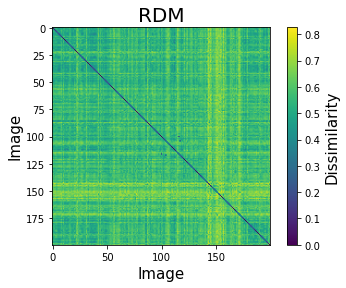

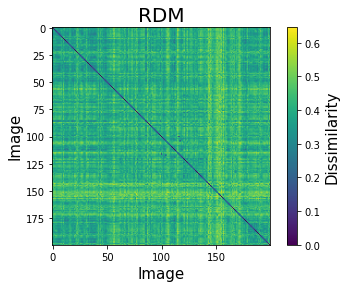

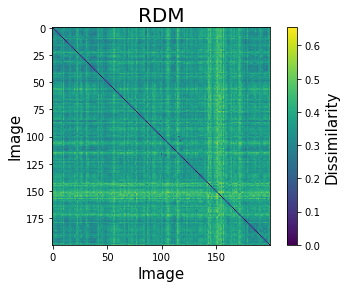

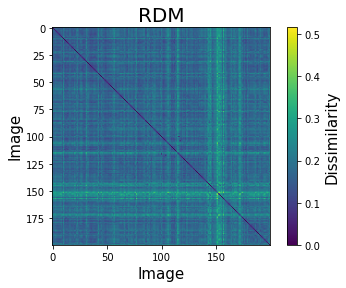

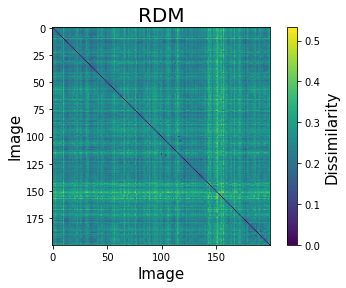

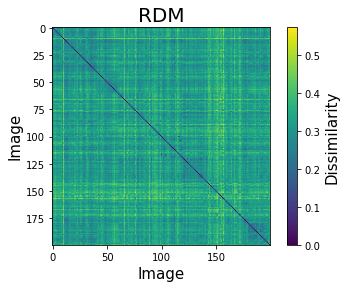

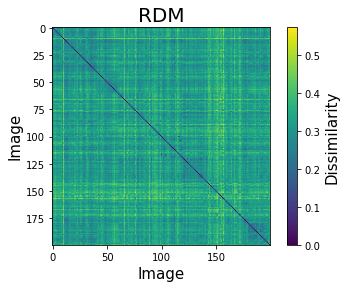

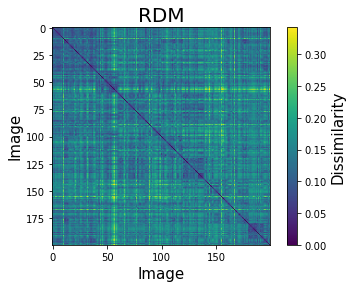

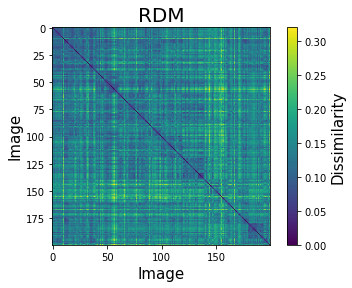

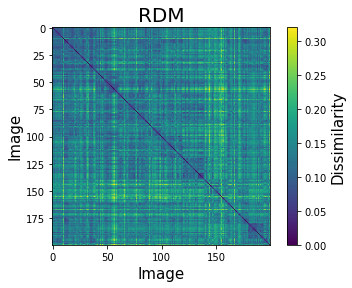

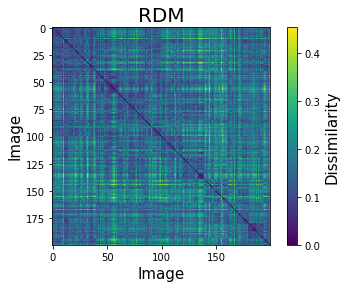

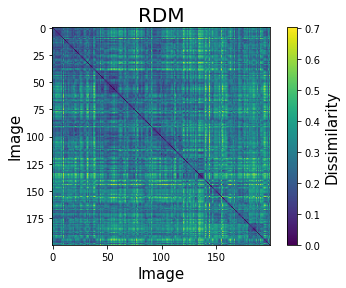

In [14]:
nodes_Memnet = ['x', 'conv1', 'relu1', 'pool1', 'norm1', 'conv2', 'relu2', 'pool2', 'norm2', 'conv3', 'relu3', 'conv4', 'relu4', 'conv5', 'relu5', 'pool5', 'view', 'fc6', 'relu6', 'drop6', 'fc7', 'relu7', 'drop7']

nodes_Alexnet = ['x', 'features.0', 'features.1', 'features.2', 'features.3', 'features.4', 'features.5', 'features.6', 'features.7', 'features.8', 'features.9', 'features.10', 'features.11', 'features.12', 'avgpool', 'flatten', 'classifier.0', 'classifier.1', 'classifier.2', 'classifier.3', 'classifier.4', 'classifier.5']

r_value = []
layer_number = []

for x in range(0,22):

    memnet_path = '/Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/data/model_features/memnet_rdm/'+nodes_Memnet[x]+'_rdm.csv'
    alexnet_path = '/Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/data/model_features/alexnet_rdm/'+nodes_Alexnet[x]+'_rdm.csv'
    
    rdm_memnet_df = pd.read_csv(memnet_path)
    rdm_alexnet_df = pd.read_csv(alexnet_path)

    rdm_memnet = rdm_memnet_df.to_numpy()
    rdm_alexnet = rdm_alexnet_df.to_numpy()

    plot_rdm (rdm_memnet)
    
    rdm_memnet_upper = upper(rdm_memnet)
    rdm_alexnet_upper = upper(rdm_alexnet)

    spearman_r, _ = spearmanr(rdm_memnet_upper, rdm_alexnet_upper)
    
    r_value.append(spearman_r)
    layer_number.append(x)



(0.0, 1.0)

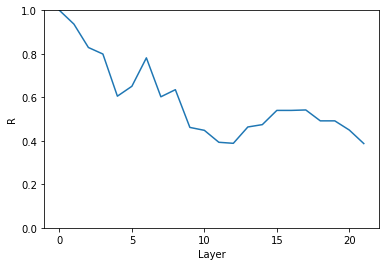

In [3]:
plt.plot(layer_number,r_value)

plt.xlabel('Layer')
plt.ylabel('R')

plt.ylim(0, 1)

In [3]:

nodes_Memnet = ['x', 'conv1', 'relu1', 'pool1', 'norm1', 'conv2', 'relu2', 'pool2', 'norm2', 'conv3', 'relu3', 'conv4', 'relu4', 'conv5', 'relu5', 'pool5', 'view', 'fc6', 'relu6', 'drop6', 'fc7', 'relu7', 'drop7']

nodes_Alexnet = ['x', 'features.0', 'features.1', 'features.2', 'features.3', 'features.4', 'features.5', 'features.6', 'features.7', 'features.8', 'features.9', 'features.10', 'features.11', 'features.12', 'avgpool', 'flatten', 'classifier.0', 'classifier.1', 'classifier.2', 'classifier.3', 'classifier.4', 'classifier.5']


r_value = []
layer_number = []

for y in range (0,100):

    num_images = 200

    random_indices = np.random.choice(num_images, num_images, replace=True) 
    
    r_value_loop = []

    for x in range(0,22):

        memnet_path = '/Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/data/model_features/memnet_rdm/'+nodes_Memnet[x]+'_rdm.csv'
        alexnet_path = '/Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/data/model_features/alexnet_rdm/'+nodes_Alexnet[x]+'_rdm.csv'

        
        rdm_memnet_df = pd.read_csv(memnet_path)
        rdm_alexnet_df = pd.read_csv(alexnet_path)

        rdm_memnet_randomized = rdm_memnet_df.iloc[random_indices, random_indices].to_numpy()
        rdm_alexnet_randomized = rdm_alexnet_df.iloc[random_indices, random_indices].to_numpy()
        
        rdm_memnet_upper = upper(rdm_memnet_randomized)
        rdm_alexnet_upper = upper(rdm_alexnet_randomized)

    
        spearman_r, _ = spearmanr(rdm_memnet_upper, rdm_alexnet_upper)
        
        r_value_loop.append(spearman_r)
    
    r_value.append(r_value_loop)

averages = [0] * len(r_value[0]) 
standard_errors = [0] * len(r_value[0])

for i in range(len(r_value[0])):
    values_at_index = [sublist[i] for sublist in r_value]
    avg = sum(values_at_index) / len(r_value)
    averages[i] = avg

    variance = sum((x - avg) ** 2 for x in values_at_index) / (len(r_value) - 1)
    std_dev = math.sqrt(variance)
    
    #sem = std_dev / math.sqrt(len(r_value))
    standard_errors[i] = std_dev

print (standard_errors)

for x in range((min(len(nodes_Memnet), len(nodes_Alexnet)))):
    layer_number.append(x)


[5.904343941302131e-17, 0.005201003275250077, 0.013430545468935058, 0.012569224734909129, 0.027806935475748695, 0.035677365553655145, 0.02360186572694807, 0.026138826915475408, 0.030822305507855644, 0.030607552465138067, 0.03886393149934908, 0.028116310483146386, 0.040847965869315044, 0.0319540696199751, 0.032507520299579096, 0.02801585020108995, 0.02801585020108995, 0.031233425932335933, 0.031766803816020976, 0.031766803816020976, 0.032221443306726515, 0.03288137319568327]


[1.0, 0.9376385074326713, 0.8324138871126412, 0.8032132805846597, 0.613978104468215, 0.6548782462598395, 0.7843468321487521, 0.6108134124744578, 0.6408023611897417, 0.4690103717961953, 0.4527318586681096, 0.40428792252410334, 0.3939641728960725, 0.47114551181141706, 0.48325074816376107, 0.5476810039790856, 0.5476810039790856, 0.5512088337327243, 0.5020078513406208, 0.5020078513406208, 0.46131268612730336, 0.4020574002211669]


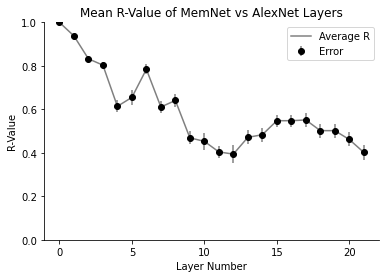

In [4]:
print (averages)

plt.plot(layer_number, averages, label='Average R', color='grey')

plt.errorbar(layer_number, averages, yerr=standard_errors, fmt='o', capsize=0, ecolor='grey', linestyle='None', label='Error', color='black')

plt.xlabel('Layer Number')
plt.ylabel('R-Value')
plt.ylim(0, 1)
plt.title('Mean R-Value of MemNet vs AlexNet Layers')
plt.legend()

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()

In [6]:

nodes_Memnet = ['x', 'conv1', 'pool1', 'conv2', 'pool2', 'conv3', 'conv4', 'conv5', 'pool5', 'view', 'fc6', 'fc7', 'drop7']

nodes_Alexnet = ['x', 'features.0', 'features.2', 'features.3', 'features.5', 'features.6', 'features.8', 'features.10', 'avgpool', 'flatten', 'classifier.1', 'classifier.4', 'classifier.5']


r_value = []
layer_number = []

for y in range (0,100):

    num_images = 200

    random_indices = np.random.choice(num_images, num_images, replace=True) 
    
    r_value_loop = []

    for x in range(0,13):

        memnet_path = '/Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/data/model_features/memnet_rdm/'+nodes_Memnet[x]+'_rdm.csv'
        alexnet_path = '/Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/data/model_features/alexnet_rdm/'+nodes_Alexnet[x]+'_rdm.csv'

        
        rdm_memnet_df = pd.read_csv(memnet_path)
        rdm_alexnet_df = pd.read_csv(alexnet_path)

        rdm_memnet_randomized = rdm_memnet_df.iloc[random_indices, random_indices].to_numpy()
        rdm_alexnet_randomized = rdm_alexnet_df.iloc[random_indices, random_indices].to_numpy()
        
        rdm_memnet_upper = upper(rdm_memnet_randomized)
        rdm_alexnet_upper = upper(rdm_alexnet_randomized)

    
        spearman_r, _ = spearmanr(rdm_memnet_upper, rdm_alexnet_upper)
        
        r_value_loop.append(spearman_r)
    
    r_value.append(r_value_loop)

averages = [0] * len(r_value[0]) 
standard_errors = [0] * len(r_value[0])

for i in range(len(r_value[0])):
    values_at_index = [sublist[i] for sublist in r_value]
    avg = sum(values_at_index) / len(r_value)
    averages[i] = avg

    variance = sum((x - avg) ** 2 for x in values_at_index) / (len(r_value) - 1)
    std_dev = math.sqrt(variance)
    
    #sem = std_dev / math.sqrt(len(r_value))
    standard_errors[i] = std_dev

print (standard_errors)

for x in range((min(len(nodes_Memnet), len(nodes_Alexnet)))):
    layer_number.append(x)


[5.233641528945917e-17, 0.0049593082033153124, 0.014366801320562929, 0.03432852557118754, 0.0164296741204163, 0.022505683187052067, 0.031115249622656924, 0.039974857969380564, 0.02726889836650454, 0.02726889836650454, 0.02944028728174091, 0.032037545767252866, 0.032610538418118104]


[1.0, 0.9378249638970725, 0.802917496728075, 0.711649465409144, 0.8621106768818003, 0.6385170616145203, 0.49403830437248325, 0.3898682843512796, 0.545228673305148, 0.545228673305148, 0.550328962484217, 0.46247243378459496, 0.40613283822524887]


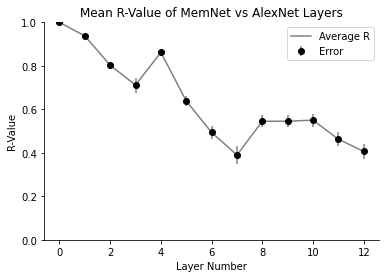

In [7]:
print (averages)

plt.plot(layer_number, averages, label='Average R', color='grey')

plt.errorbar(layer_number, averages, yerr=standard_errors, fmt='o', capsize=0, ecolor='grey', linestyle='None', label='Error', color='black')

plt.xlabel('Layer Number')
plt.ylabel('R-Value')
plt.ylim(0, 1)
plt.title('Mean R-Value of MemNet vs AlexNet Layers')
plt.legend()

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()